# Intro to Plotting

## Objectives

* Plot data from a Pandas DataFrame using Pandas' plotting tools
* Use matplotlib to take more control of figures
* Understand matplotlib's Figures and Axes
* Know some advantages to using seaborn

This is a little bit of IPython magic that causes plots to show up inline in the Notebook instead of in a separate window:

In [2]:
%matplotlib inline

## Plotting with Pandas

Pandas has some convenient routines for making plots straight out from data in DataFrames and Series.

We'll use the same data from the Pandas lesson:

In [1]:
import pandas as pd

In [3]:
monthly = pd.read_csv('precip_monthly.csv')

Let's start with plot of the mean California rainfall over the years.
The first step will be to use groupby ot aggregate the data by year:

In [25]:
yearly = monthly.groupby('year').precip.mean()
yearly.head()

year
1987    1.435867
1988    1.791026
1989    2.175821
1990    1.668407
1991    1.787778
Name: precip, dtype: float64

That gives us a Series, which has a `.plot` method for plotting the index of the Series vs. the values:

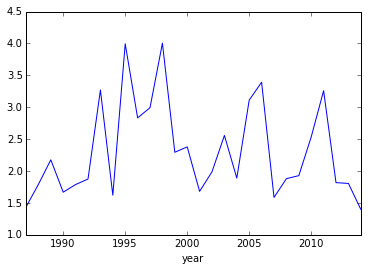

In [61]:
yearly.plot()

Or we can compare regions and make a bar chart:

In [43]:
regional = monthly.groupby('region').precip.mean()
regional

region
CENTRAL COAST        1.870413
COLORADO RIVER       0.299043
NORTH COAST          3.564866
NORTH LAHONTAN       1.722785
SACRAMENTO RIVER     3.365458
SAN FRANCISCO BAY    2.514868
SAN JOAQUIN RIVER    2.268685
SOUTH COAST          1.427060
SOUTH LAHONTAN       0.945169
TULARE LAKE          1.863512
Name: precip, dtype: float64

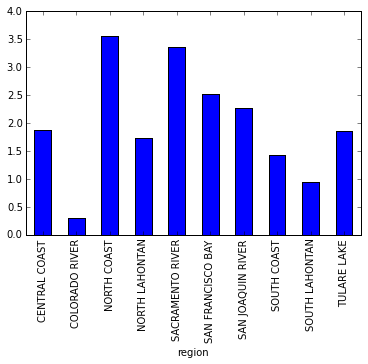

In [44]:
regional.plot(kind='bar')

This is a lot easier to read if it's sorted:

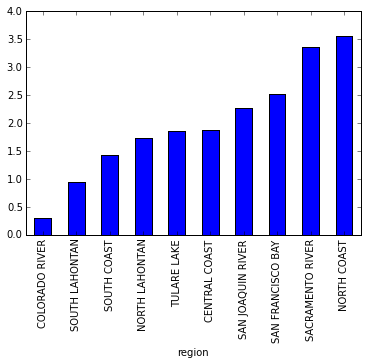

In [49]:
regional.sort(inplace=False).plot(kind='bar')

(Check this map if you're curous where these different regions are: http://www.oocities.org/watergeographer/hydromap.gif.)

If you have a DataFrame of data with the same kind of data in each column you can use the `.plot` method to create plots with different lines (or other styles) for each column.
But first we need to make a DataFrame with data laid out in that way.
Let's compare average rainfall in each region over time, which requires grouping on year *and* region then calculating the mean:

In [46]:
regional_yearly = monthly.groupby(['year', 'region']).precip.mean()
regional_yearly.head(15)

year  region           
1987  CENTRAL COAST        1.090809
      COLORADO RIVER       0.247500
      NORTH COAST          2.681029
      NORTH LAHONTAN       0.891042
      SACRAMENTO RIVER     1.816042
      SAN FRANCISCO BAY    1.335000
      SAN JOAQUIN RIVER    1.229135
      SOUTH COAST          0.819286
      SOUTH LAHONTAN       0.637162
      TULARE LAKE          1.239474
1988  CENTRAL COAST        1.430694
      COLORADO RIVER       0.455417
      NORTH COAST          2.919242
      NORTH LAHONTAN       1.056458
      SACRAMENTO RIVER     2.332746
Name: precip, dtype: float64

`regional_yearly` is a Series with a two-level index (a `MultiIndex`), one for year and one for region.
What we're after is a DataFrame with regions as columns and precip values for each region/year in the table.
The Series `.unstack()` method can be used to pivot index labels into column labels:

In [47]:
regional_yearly = regional_yearly.unstack(level='region')
regional_yearly.head()

region,CENTRAL COAST,COLORADO RIVER,NORTH COAST,NORTH LAHONTAN,SACRAMENTO RIVER,SAN FRANCISCO BAY,SAN JOAQUIN RIVER,SOUTH COAST,SOUTH LAHONTAN,TULARE LAKE
year,,,,,,,,,,
1987,1.090809,0.247500,2.681029,0.891042,1.816042,1.335000,1.229135,0.819286,0.637162,1.239474
1988,1.430694,0.455417,2.919242,1.056458,2.332746,1.744444,1.492066,1.517584,1.046987,1.483174
1989,1.226241,0.116250,3.560303,2.075486,3.307723,1.884028,1.860304,0.976944,0.851603,1.580833
1990,0.946806,0.226458,2.782821,1.415625,2.405227,1.486310,1.587179,0.892629,0.762308,1.118742
1991,1.624861,0.312708,2.341033,1.318645,2.308409,1.592619,1.726571,1.506389,0.956026,1.647933


Now we can use `.plot` to get a different line on the plot for every region:

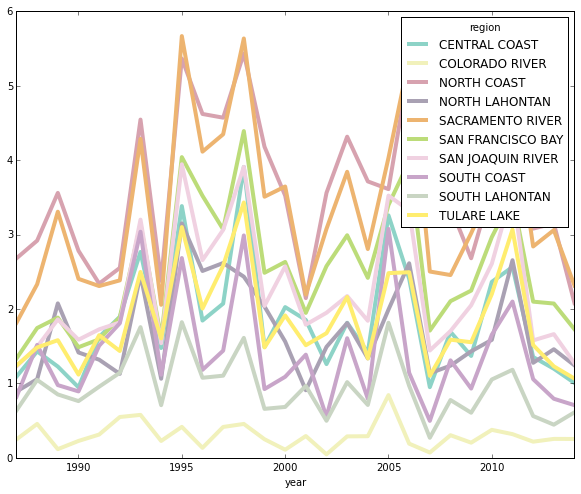

In [57]:
regional_yearly.plot(kind='line', figsize=(10, 8), colormap='Set3', linewidth=4)

That's a lot of lines, though.
We can use a box plot to more clearly see regional variation, but it masks the yearly variation (as with a bar chart).

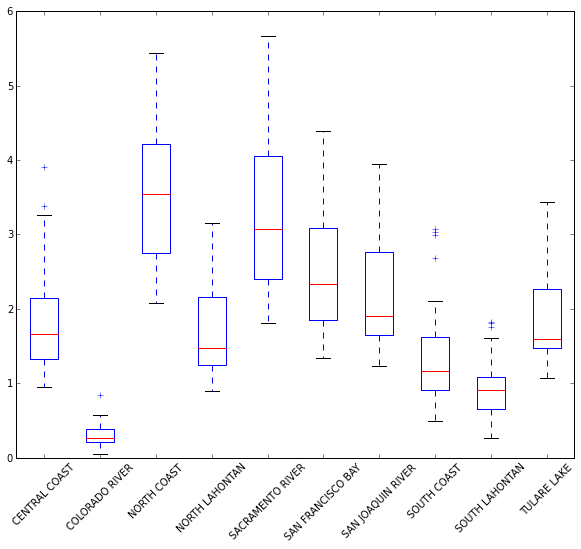

In [60]:
regional_yearly.plot(kind='box', figsize=(10, 8), rot=45)

### Exercise

The `monthly` DataFrame has a `'pct of avg'` column that describes how the amount of measured precipitation compares to the previously recorded average.
Use the `'pct of avg'` column to make plots like those above, and feel free to experiment!

**Note!** You can't use `.pct of avg` to refer to the `'pct of avg'` column. Use `['pct of avg']` instead.

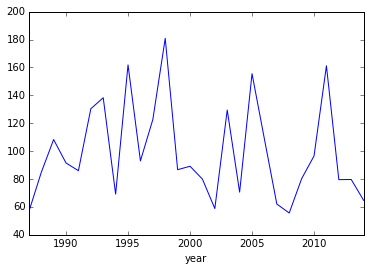

In [62]:
yearly = monthly.groupby('year')['pct of avg'].mean().plot()

In [67]:
regional_yearly = monthly.groupby(['year', 'region'])['pct of avg'].mean().unstack(level='region')
regional_yearly.head()

region,CENTRAL COAST,COLORADO RIVER,NORTH COAST,NORTH LAHONTAN,SACRAMENTO RIVER,SAN FRANCISCO BAY,SAN JOAQUIN RIVER,SOUTH COAST,SOUTH LAHONTAN,TULARE LAKE
year,,,,,,,,,,
1987,42.963235,127.191489,66.625000,49.486111,51.272727,29.791667,37.525641,79.644578,63.905405,64.423197
1988,84.159722,160.106383,79.102273,65.840278,73.265152,71.763889,75.301639,103.971591,116.647436,90.897281
1989,73.601504,29.212766,110.083333,138.909722,152.764706,109.555556,117.412162,47.780899,71.961538,87.750809
1990,73.187500,101.021277,115.355311,103.604167,96.526515,110.535714,85.653846,93.023121,90.865385,62.351171
1991,84.104167,94.978723,95.228782,104.612903,87.687500,78.059524,77.919872,111.814607,77.525641,63.824916


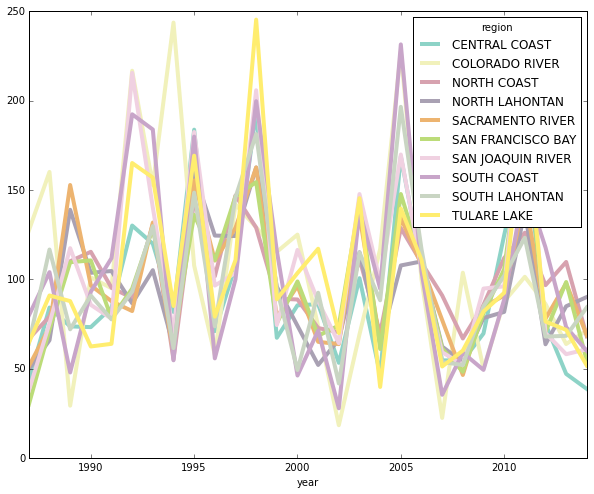

In [68]:
regional_yearly.plot(kind='line', figsize=(10, 8), colormap='Set3', linewidth=4)

We'll come back to the `'pct of avg'` plot in a few minutes.

## matplotlib

Pandas is making the above plots using a library called [matplotlib](http://matplotlib.org/).
The Pandas `.plot()` method is great for quickly creating plots from data in a DataFrame or Series,
but maybe your data is in NumPy arrays or you want more control than Pandas gives you.
In those situations you'll likely start working with matplotlib directly.

In [70]:
import matplotlib.pyplot as plt
import matplotlib.style as style